# Functions used

This function is useful for the K-fold validation

In [1]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

# 1 - Importing the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We import the train dataset first.

In [3]:
housing_tr = pd.read_csv("data/train.csv")

### Data's structure

Let's visualize the 5 first rows:

In [4]:
housing_tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing_tr.shape

(1460, 81)

Each row represents a house. There are 81 columns (or variables) and 1460 rows. The dataset might be a little too small for training a machine learning model.

In [6]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 19 variables which have missing data. Later we will either delete it or replace the missing data with other data.

We make a copy of the train dataset in case on we want to check the original data;

The variable to predict is `SalePrice`, its type is `int64` and there are no missing data.

In [11]:
housing_train=housing_tr.copy()

Now let's examine the quantitative variables:

In [12]:
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


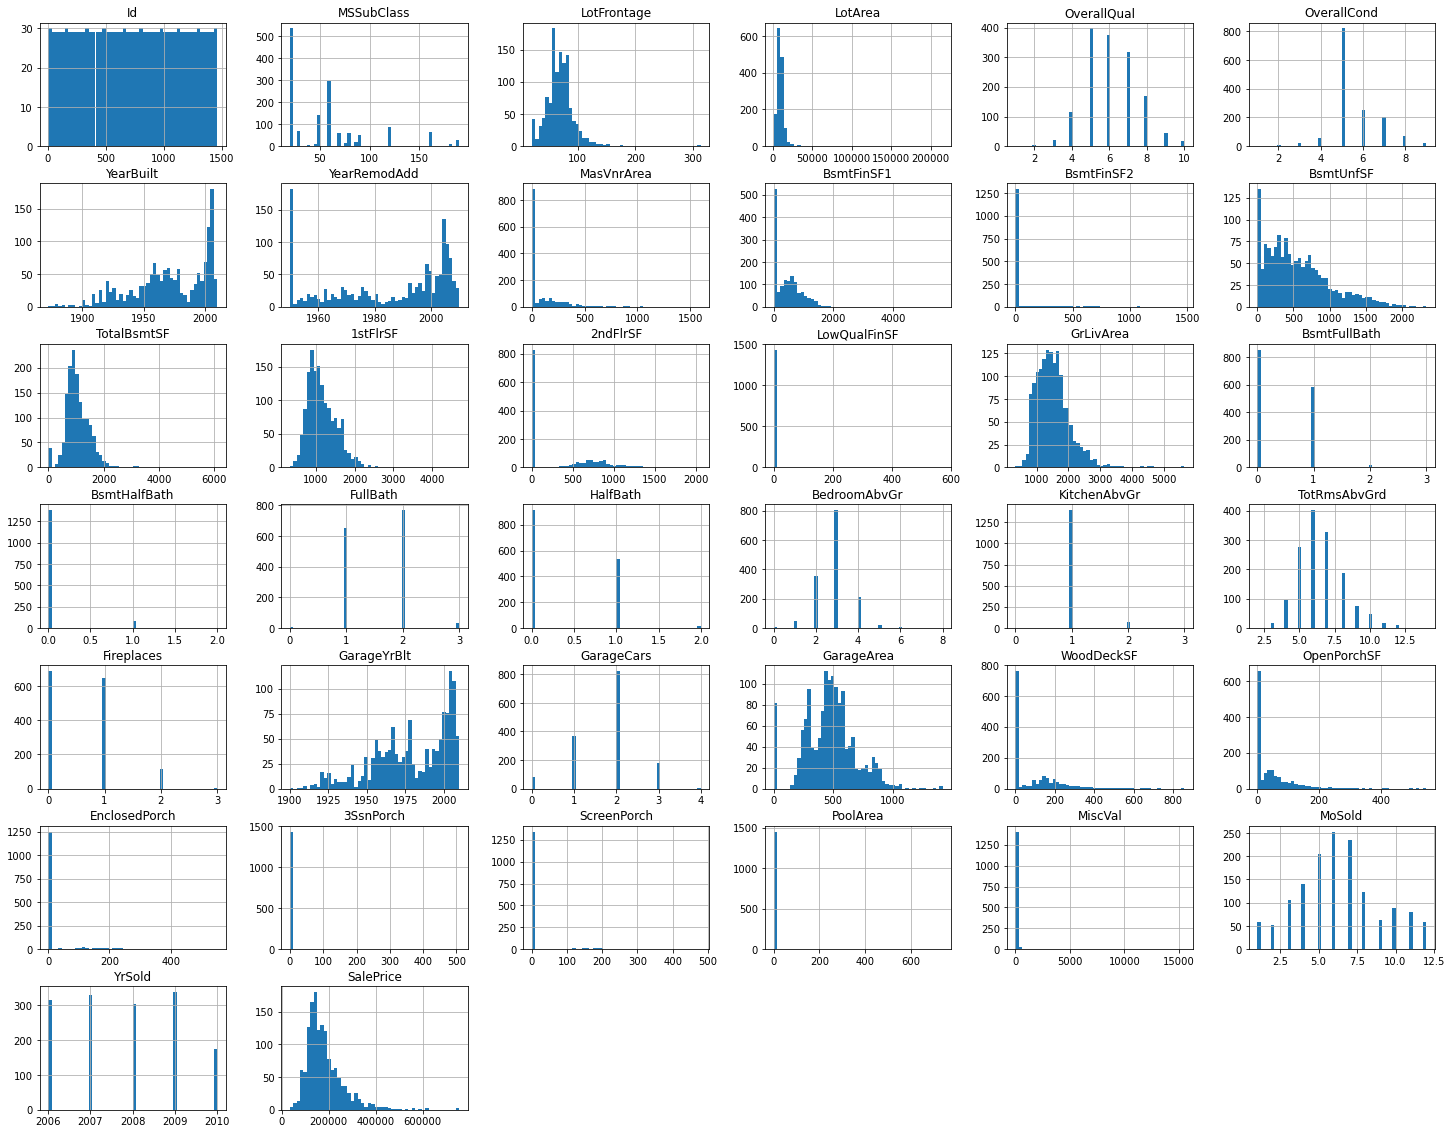

In [13]:
housing_train.select_dtypes(include="number").hist(bins=50, figsize=(25,20))
plt.show()

# 2 - Data visualization

Given that the data set is of reasonable size, we can investigate whether there are possible linear relationships between two variables.

<AxesSubplot:>

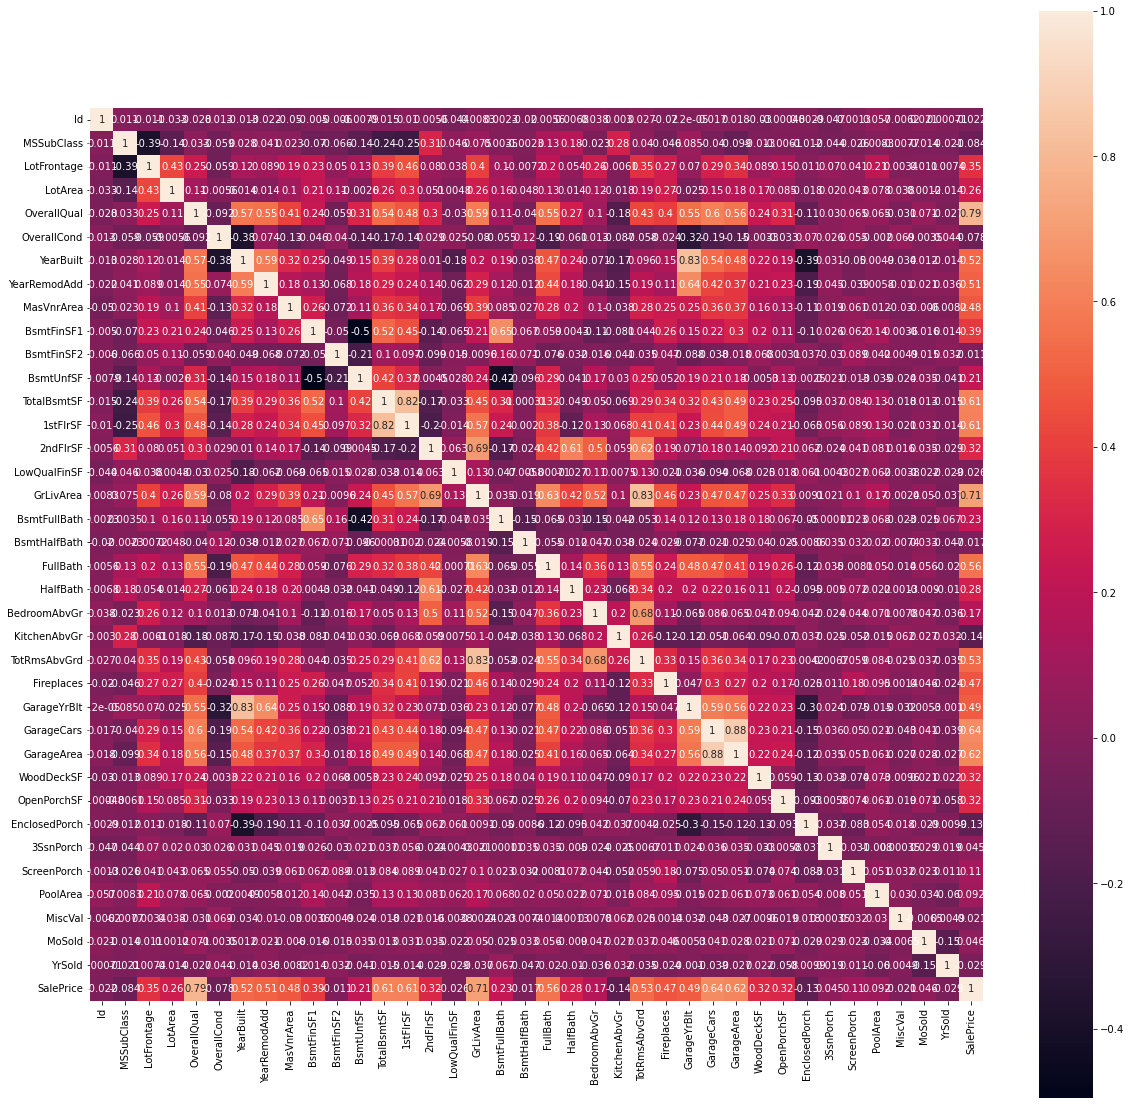

In [14]:
plt.figure(figsize=(20,20))
corr_matrix = housing_train.corr()
sns.heatmap(corr_matrix, annot=True, square=True)

Let's now look at the correlation between each of the variables and `SalePrice`

In [15]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We noticed some high absolute correlation rates over 0.6 between `SalePrice` and respectively `OverallQual`,`GrLivArea`, `GarageCars`,`GarageArea` and `TotalBsmtSF`. That means that there are positive linear relationships between these variables, for instance if `SalePrice` increases then `OverallQual` will increase too. And vice-versa. And if `OverallQual` decreases than `SalePrice` will decrease too, and vice-versa.

Given that there are 38 variables, we will obtain 38^2=1444 graphics. We decide to focus on some variables that are correlated to `SalePrice`.

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageCars', yla

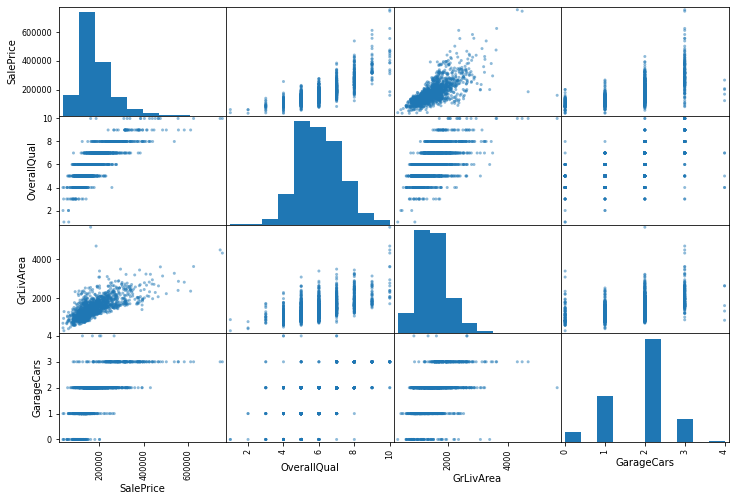

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice","OverallQual","GrLivArea","GarageCars"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))

We create a Series which only contains the prices of the houses and we delete 'SalePrice' in our dataset to train our model later.

In [17]:
housing_train_labels = housing_train["SalePrice"].copy()
housing_train.drop(labels="SalePrice", axis=1, inplace=True)

# 3 - Data preparation for machine learning models

## Step 1: Cleaning the data

### Qualitative data

First, let's clean the qualitative variables

In [18]:
for index,value in housing_train.select_dtypes(include="object").isnull().sum().sort_values(ascending=False).items():
    if value != 0 :
        print(f"Column's name {index}, number of missing value {value} \n")

Column's name PoolQC, number of missing value 1453 

Column's name MiscFeature, number of missing value 1406 

Column's name Alley, number of missing value 1369 

Column's name Fence, number of missing value 1179 

Column's name FireplaceQu, number of missing value 690 

Column's name GarageType, number of missing value 81 

Column's name GarageCond, number of missing value 81 

Column's name GarageQual, number of missing value 81 

Column's name GarageFinish, number of missing value 81 

Column's name BsmtFinType2, number of missing value 38 

Column's name BsmtExposure, number of missing value 38 

Column's name BsmtFinType1, number of missing value 37 

Column's name BsmtQual, number of missing value 37 

Column's name BsmtCond, number of missing value 37 

Column's name MasVnrType, number of missing value 8 

Column's name Electrical, number of missing value 1 



We decide to delete the columns `PoolQC`, `MiscFeature` and `Alley` because there are more than 90% of missing data.

In [19]:
housing_train.drop(["PoolQC","MiscFeature","Alley"], axis=1, inplace=True)

Then we will replace the missing data with "None" thanks to Scikit-Learn module `SimpleImputer()`.

Also we will encode all the catorical variables thanks to `OneHotEncoder()`.

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy="constant", fill_value="None")),
    ('encoded', OneHotEncoder(handle_unknown="ignore")),
])

housing_cat_tr = cat_pipeline.fit_transform(housing_train.select_dtypes(include="object"))

### Quantitative data:

Let's clean the quantitative variables:

In [21]:
for index,value in housing_train.select_dtypes(include="number").isnull().sum().sort_values(ascending=False).items():
    if value != 0 :
        print(f"Column's name {index}, number of missing value {value} \n")

Column's name LotFrontage, number of missing value 259 

Column's name GarageYrBlt, number of missing value 81 

Column's name MasVnrArea, number of missing value 8 



We will replace the missing numeric values with the median of their columns thanks to `SimpleImputer()`.

## Step 2: ColumnTransformer

In [23]:
from sklearn.compose import ColumnTransformer

num_attribs = housing_train.select_dtypes(include="number").columns.tolist()
cat_attribs = housing_train.select_dtypes(include="object").columns.tolist()

full_pipeline = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_attribs),
    ("cat", cat_pipeline, cat_attribs),])

In [24]:
housing_prepared = full_pipeline.fit_transform(housing_train)

In [25]:
# full_pipeline_1.transformers_[2][1]\
# ['encoded'].get_feature_names(housing_train.select_dtypes(include="object").columns.tolist())

In [26]:
housing_prepared.shape

(1460, 292)

In [27]:
housing_prepared.toarray()

array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

# 4 - Selectionning and fitting a model

**Linear regression model:**

First let's fit a linear model which is one of the simpler models for linear regression.

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_train_labels)

LinearRegression()

In [30]:
some_data = housing_train.iloc[:5]
some_labels = housing_train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ",lin_reg.predict(some_data_prepared))
print("Etiquettes: ",list(some_labels))

Predictions:  [208953.08298888 202053.34205734 206212.83447041 171503.59988025
 292413.97570142]
Etiquettes:  [208500, 181500, 223500, 140000, 250000]


Let's calculate the root mean squared error (RMSE) to assess our model:

In [31]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_train_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

21539.38077016993

The error prediction is 21 539$. So let's do the K-folds validation to calculate the RMSE on many data ensembles:

In [32]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [33]:
display_scores(lin_rmse_scores)

Scores:  [22550.27832456 27837.61080827 25959.86193353 40675.93819798
 32089.72538326 43044.30213409 25497.15656495 25027.92216766
 61963.35682023 22848.88946579]
Mean:  32749.504180033156
Standard deviation:  11862.49302678482


The mean of the RMSE on these 10 sets is 32 749, it is higher than our previous RMSE it seems that the model is overfitting. Let's see if there are some better models than the linear model.

**Decision Tree model**

In [34]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_train_labels)

DecisionTreeRegressor()

In [35]:
housing_predictions =  tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_train_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The RMSE is 0, we may wonder if the model overfits the train dataset. Let's take a look at the K-folds validation:

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [37]:
display_scores(tree_rmse_scores)

Scores:  [34662.02825939 39171.69792318 34259.9391469  42168.64920597
 40312.68045881 31440.08418263 31417.93101016 36171.03228433
 49768.88556543 37340.9113008 ]
Mean:  37671.38393375873
Standard deviation:  5261.098216673174


The rmse mean is 37 671, so the performances of the decision tree are actually worse than those of the linear model. Now let's train a random forest model.

**Random Forest model**

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_train_labels)

RandomForestRegressor()

In [39]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_train_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11007.121006117985

The RMSE is 11 007 and is better than the decision tree's RMSE and the linear model's RMSE. Let's see the K-folds validation:

In [40]:
scores = cross_val_score(forest_reg, housing_prepared, housing_train_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [42]:
display_scores(forest_rmse_scores)

Scores:  [25551.98145445 26507.31850984 22185.902579   38982.59839607
 34321.44992079 26708.30754393 23674.95840323 23387.38013576
 43419.98455252 27398.40783641]
Mean:  29213.828933201195
Standard deviation:  6838.549293884676


The mean of the RMSE is 29 213, the Random Forest model is the best model. However the RMSE of the validation dataset is higher than the RMSE of the train dataset, therefore our model is overfitting.

# Adjusting with precision our model

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3, 10,30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [44]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(housing_prepared, housing_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [46]:
final_model = grid_search.best_estimator_

In [47]:
feature_importances = final_model.feature_importances_

In [48]:
housing_test = pd.read_csv("data/test.csv")

In [49]:
housing_test.drop(labels=["PoolQC","MiscFeature","Alley"],axis=1, inplace=True)

In [50]:
housing_test_prepared = full_pipeline.transform(housing_test)
final_predictions = final_model.predict(housing_test_prepared)

In [53]:
final_predictions[0]

127290.0